<a href="https://colab.research.google.com/github/jmda8400/covid-data-tracker/blob/main/Covid_data_tracker_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Amount of cases and deaths of a given country by COVID-19.
Possible countries:
['Dominica', 'Guinea', 'Isle of Man', 'Cayman Islands', 'Netherlands', 'Sierra Leone', 'Cape Verde', 'Bosnia and Herzegovina', 'Burkina Faso', 'United Arab Emirates', 'Puerto Rico', 'Indonesia', 'Mauritius', 'Brunei', 'Palestine', 'Nigeria', 'Spain', 'Fiji', 'Sudan', 'Guatemala', 'Venezuela', 'Costa Rica', 'Cyprus', 'Bermuda', 'Malawi', 'Nepal', 'India', 'Tanzania', 'Kyrgyzstan', 'Panama', 'Somalia', 'Brazil', 'Portugal', 'Jordan', 'Switzerland', 'Bangladesh', 'Gambia', 'South Africa', 'Chile', 'Bahamas', 'Finland', 'Swaziland', 'Lesotho', 'Gabon', 'Botswana', 'Chad', 'Ethiopia', 'Azerbaijan', 'Burundi', 'Haiti', 'Iraq', 'Saint Kitts and Nevis', 'Serbia', 'Uruguay', 'Georgia', 'Norway', 'United States', 'Estonia', 'Nicaragua', 'Rwanda', 'Kazakhstan', 'Antigua and Barbuda', 'Saint Lucia', 'Zambia', 'Macedonia', 'Wallis and Futuna', 'Solomon Islands', 'Anguilla', 'Jamaica', 'Mali', 'Mauritania', 'Grenada', 'El

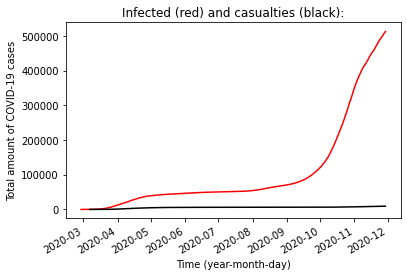

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import matplotlib.ticker as tkr
import datetime
from datetime import datetime
import requests


#First script

#Bring a comma separated value file

def wget(url):
    r = requests.get(url, allow_redirects=True)
    with open(url[url.rfind('/') + 1::], 'wb') as f:
        f.write(r.content)

wget ("https://covid.ourworldindata.org/data/ecdc/full_data.csv")

file = pd.read_csv("full_data.csv")
data = file.to_dict("list")

#Welcome menu

print("Amount of cases and deaths of a given country by COVID-19.")

#Safety measure

varCheck = []

for i in range(0, len(data["date"])):
    varCheck.append(data['location'][i])

setCheck = set()

for x in varCheck:
    setCheck.add(x)

listCheck = list()
listCheck = list(setCheck)

print("Possible countries:")
print(listCheck)

country = input("Type the name of a country (first letter in uppercase please): ")

#The safety measure will automatically check if the user's input is in fact a country.

if country in listCheck:
    print("Country found. Plotting data.")
else:
    z = 1
    while z == 1:
        print("Wrong.")
        country = input("Type the name of a country (first letter in uppercase please): ")
        if country in listCheck:
            print("Country found. Plotting data.")
            z = 0

#//

t1 = [data["date"][0]]
s1 = [data["total_cases"][0]]
d1 = [data["total_deaths"][0]]

#If the input country is equal to a country listed in the database, the variables above this comment will take the information (day, amount of cases and deaths).

for i in range(1, len(data["date"])):
    if country == (data["location"][i]):
        t1.append(data["date"][i])
        s1.append(data["total_cases"][i])
        d1.append(data["total_deaths"][i])

### I need to go from my dates string list to a format matplotlib can recognize as dates

date = (datetime.strptime(ts, '%Y-%m-%d') for ts in t1)
date_strings = [datetime.strftime(d, '%Y-%m-%d') for d in date]

### Just plotting

fig, ax = plt.subplots()
date_strings = mdates.datestr2num(date_strings)
plt.title('Infected (red) and casualties (black):')
plt.ylabel('Total amount of COVID-19 cases')
plt.xlabel('Time (year-month-day)')
ax.plot(date_strings, s1, 'r-')
ax.plot(date_strings, d1, 'k-')
ax.xaxis_date()
fig.autofmt_xdate()

plt.show()